# **Ali Padyav - 810199388**
### **AI - CA5 - NN** (Part 4)

In [35]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import classification_report

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

<div style="background-color:#54504F; color: white; padding: 20px; font-size:25px; width: 400px;">1- Creating NN</div>

In [36]:
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.reshape(x_train.shape[0], -1)

In [37]:
x_test = x_test / 255
x_train = x_train / 255

In [38]:
y_test = keras.utils.to_categorical(y_test, 10)
y_train = keras.utils.to_categorical(y_train, 10)

In [39]:
EPOCHS = 10
LEARNING_RATE = 0.01
BATCH_SIZE = 32

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train.shape[1:]))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.summary()
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_34 (Dense)            (None, 30)                92190     
                                                                 
 dense_35 (Dense)            (None, 30)                930       
                                                                 
 dense_36 (Dense)            (None, 10)                310       
                                                                 
Total params: 93,430
Trainable params: 93,430
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9642 - accuracy: 0.2865 - val_loss: 1.8350 - val_accuracy: 0.3361
Epoch 2/10
1563/1563 [===============

In [40]:
def report(x_test, y_test, prediction):
    actual = np.argmax(y_test, axis=1)
    predicted = np.argmax(prediction, axis=1)
    return classification_report(actual, predicted)

In [41]:
def plot_res(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['val_accuracy'], label='Test Accuracy')
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.subplot(1, 2, 2)
    plt.plot(history['val_loss'], label='Test Loss')
    plt.plot(history['loss'], label='Train Loss')
    plt.title('Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_37 (Dense)            (None, 256)               786688    
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8821 - accuracy: 0.3239 - val_loss: 1.7904 - val_accuracy: 0.3677
Epoch 2/10
1563/1563 [=============

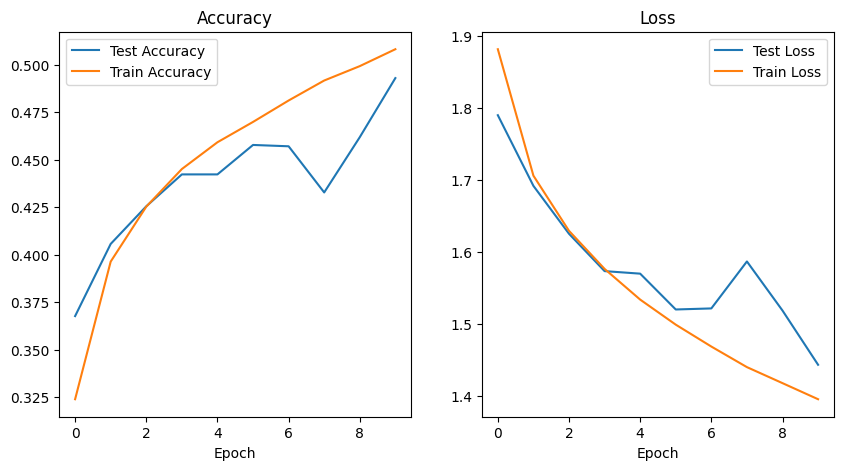

In [43]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train.shape[1:]))
model.add(keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.2)))
model.add(keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.2)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.summary()
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))
print(report(x_test, y_test, model.predict(x_test)))
print(report(x_train, y_train, model.predict(x_train)))
plot_res(log.history)

<div style="background-color:#54504F; color: white; padding: 20px; font-size:25px; width: 400px;">2- Affection</div>

<div dir="rtl">
تاثیر تعداد epoch:
<br>
در همه مسائل نیاز به چندین epoch نیست. چه بسا حتی با یک epoch هم مدل به اندازه کافی همگرا شده باشد.
<br>
هرچه تعداد epoch ها بیشتر شود دقت مدل روی داده train بیشتر میشود و این تا جایی خوب است. از جایی به بعد ممکن است باعث overfit شود.
برای مقابله میتوان از داده validation استفاده کرد تا بدانیم چقدر مدل را train کنیم.
</div>

<div dir="rtl">
تاثیر loss function:
</div>

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 3072)              0         
                                                                 
 dense_40 (Dense)            (None, 256)               786688    
                                                                 
 dense_41 (Dense)            (None, 256)               65792     
                                                                 
 dense_42 (Dense)            (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0882 - accuracy: 0.1811 - val_loss: 0.0865 - val_accuracy: 0.2319
Epoch 2/10
1563/1563 [=============

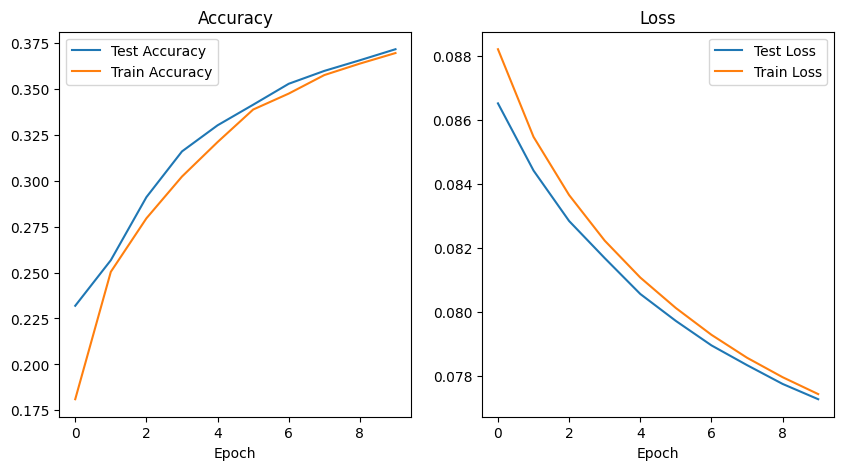

In [44]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train.shape[1:]))
model.add(keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.2)))
model.add(keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.2)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), loss='mse', metrics=['accuracy'])

model.summary()
log = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))
print(report(x_test, y_test, model.predict(x_test)))
print(report(x_train, y_train, model.predict(x_train)))
plot_res(log.history)

<div dir="rtl">
تابع mse برای classification مناسب نیست.
چون نمیتواند به خوبی فاصله 2 کلاس را محاسبه کند. ولی برای linear regression ها به خوبی عمل میکند.
</div>